<a href="https://colab.research.google.com/github/jpastorcasquero/Colab/blob/main/Copia_de_Inteligencia_Artificial_Problema_del_Vendedor_Ambulante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema del Viajante

https://es.wikipedia.org/wiki/Problema_del_viajante


Dada una lista de ciudades y las distancias entre ellas, las capitales de todas las provincias españolas, por ejemplo, ¿cual es la ruta mas corta que visita cada ciudad y regresa a la ciudad original?

Cuaderno adaptado de:

https://colab.research.google.com/github/Albina1810/tsp/blob/master/TSP.ipynb

Por Prof. Hector Barrio Crespo.


Universidad Europea, 2021
Revisado Octubre 2022

# Intercambio par a par
El intercambio par a par o técnica 2-opt involucra en cada iteración la eliminación de dos aristas y el reemplazo de estas con dos aristas diferentes que reconecten los fragmentos creados por la eliminación de las aristas produciendo un camino nuevo más corto. Esto es un caso especial del método k-opt. 

Note que la etiqueta Lin–Kernighan es un nombre erróneo para el 2-opt muchas veces utilizado. Lin–Kernighan es realmente el método más general de k-opt (https://en.wikipedia.org/wiki/2-opt).

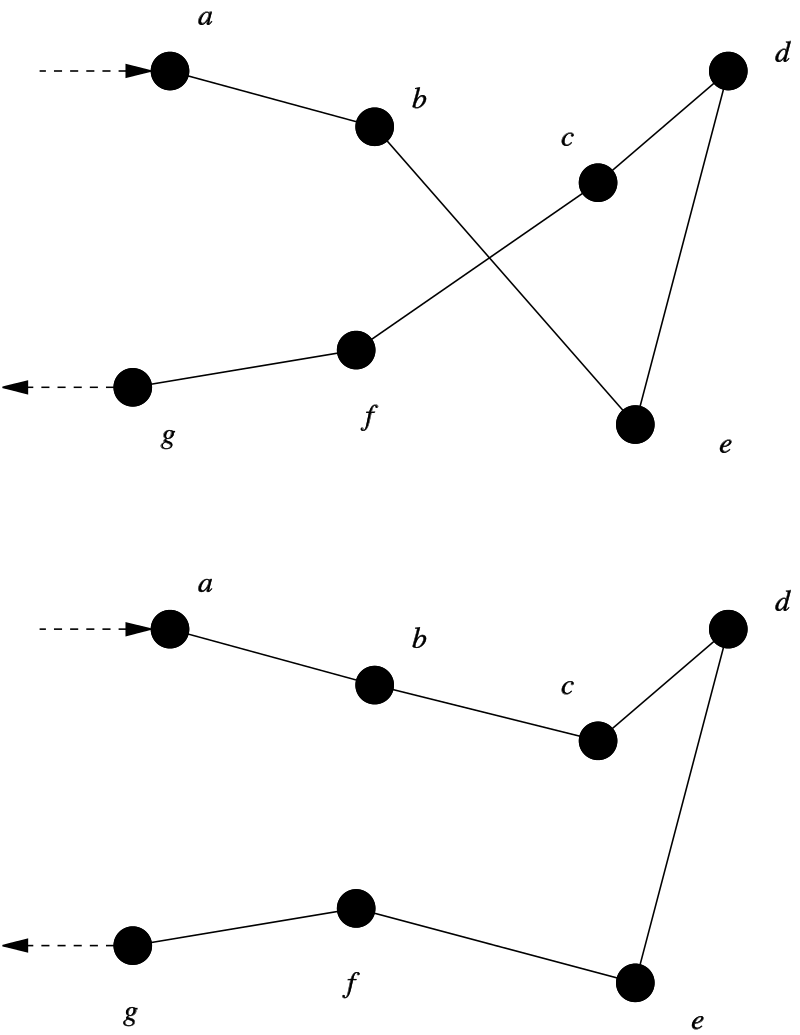

In [1]:
import numpy as np # Vectores - importo munpy como np
import pandas as pd # Pandas es como un excel
from math import radians, cos, sin # Importamos el math
from sklearn.preprocessing import MinMaxScaler # Lo utilizaremos para establecer
#  una escala en la distancia de las poblaciones
import matplotlib.pyplot as plt # Usado para hacer graficas
from google.colab import files # Lo usamos para importar ficheros y trabajar con 
# ellos. Se guarda el /content donde carga lo que subamos

In [2]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r, c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) 
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r, i, k: np.concatenate((r[0:i],
                                            r[k:-len(r)+i-1:-1],
                                            r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Vector de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)
    
    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist 
        
        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1, len(ruta)-2):
            # Para cada ciudad subsiguiente:
            for cambiar_ultima in range(cambiar_primera + 1, len(ruta)):
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta, cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:                
                if nueva_distancia < mejor_dist: 
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

# **Importar csv con Longitud y Latitud de las ciudades**

Importamos un archivo csv con longitud y latitud de ciudades, en este caso ciudades de Guipuzcoa extraidas de https://www.coordenadas.com.es/espana/pueblos-de-guipuzcoa/20/1.

In [3]:
# Elimino el archivo si ya esta creado para evitar que me lo renombre
from os import remove
from os import path
if path.isfile("/content/ciudades_castilla_b.csv"):
  remove("/content/ciudades_castilla_b.csv")
  print ("fichero borrado\n")
# Cargamos el archivo.  Tener en cuenta el formato raw, si no carga mal
!wget https://raw.githubusercontent.com/jpastorcasquero/Colab/main/ciudades_castilla_b.csv
#!wget https://raw.githubusercontent.com/Hbarrio-UEM/Inteligencia-Artificial/main/ciudades_guipuzcoa.csv

--2022-10-23 17:13:12--  https://raw.githubusercontent.com/jpastorcasquero/Colab/main/ciudades_castilla_b.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5196 (5.1K) [text/plain]
Saving to: ‘ciudades_castilla_b.csv’

ciudades_castilla_b 100%[===================>]   5.07K  --.-KB/s    in 0s      

2022-10-23 17:13:12 (51.7 MB/s) - ‘ciudades_castilla_b.csv’ saved [5196/5196]



In [4]:
#ciudades= pd.read_csv("/content/ciudades_guipuzcoa.csv", header=None)
# Hay un error en la tabla y esta cambiado latitud por longitud.
# Lo cambiamos para que corresponda.
ciudades= pd.read_csv("/content/ciudades_castilla_b.csv", header=None)
ciudades.head(5)

,0,1
0,LA SAGRADA,"40.743607,-6.072182"
1,VILLABARUZ DE CAMPOS,"42.010352,-4.9953"
2,NOGAL DE LAS HUERTAS,"42.393314,-4.641243"
3,VILLAFLORES,"41.083543,-5.233754"
4,BOADILLA DE RIOSECO,"42.178273,-4.968525"


In [5]:
ciudades[['Lon', 'Lat']] = ciudades[1].str.split(',', 1, expand=True)

In [6]:
ciudades.head()

,0,1,Lon,Lat
0,LA SAGRADA,"40.743607,-6.072182",40.743607,-6.072182
1,VILLABARUZ DE CAMPOS,"42.010352,-4.9953",42.010352,-4.9953
2,NOGAL DE LAS HUERTAS,"42.393314,-4.641243",42.393314,-4.641243
3,VILLAFLORES,"41.083543,-5.233754",41.083543,-5.233754
4,BOADILLA DE RIOSECO,"42.178273,-4.968525",42.178273,-4.968525


In [7]:
ciudades [1].str.split(',') # Realizado por mi para probar la funcion

0      [40.743607, -6.072182]
1        [42.010352, -4.9953]
2      [42.393314, -4.641243]
3      [41.083543, -5.233754]
4      [42.178273, -4.968525]
                ...          
132    [41.962906, -3.417637]
133    [41.911792, -2.762725]
134     [42.536209, -4.26807]
135    [41.494172, -5.588951]
136    [42.201325, -4.530691]
Name: 1, Length: 137, dtype: object

In [8]:
ciudades.iloc[83] # Realizado por mi para devolver la fila

0      SANTA EUFEMIA DEL BARCO
1          41.678493,-5.899538
Lon                  41.678493
Lat                  -5.899538
Name: 83, dtype: object

In [9]:
ciudades.info() # Realizado por mi para ver los tipos de datos en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       137 non-null    object
 1   1       137 non-null    object
 2   Lon     137 non-null    object
 3   Lat     137 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


In [10]:
# Por defecto, el tipo de datos en el dataframe es "object".
# Pasando los datos a tipo "numeric" mejoramos la manera de trabajar con ellos.
ciudades['Lon'] = ciudades['Lon'].apply(pd.to_numeric)
ciudades['Lat'] = ciudades['Lat'].apply(pd.to_numeric)

In [11]:
ciudades.info() # Para ver que los datos han pasado a numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       137 non-null    object 
 1   1       137 non-null    object 
 2   Lon     137 non-null    float64
 3   Lat     137 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.4+ KB


# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html
 
 
 


In [12]:
R = 6371 #radio de la tierra
# Pasamos a radianes latitud y longitud.
lat = ciudades["Lat"].map(radians) 
lon = ciudades["Lon"].map(radians)
# Pasamos a x e y la longitud y latitud - a un plano.
x = lon.map(cos) * lat.map(cos) * R 
y = lon.map(cos) * lat.map(sin) * R
# Damos nombres a las comlumnas.  
ciudades["lat_rads"] = lat 
ciudades["lon_rads"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,LA SAGRADA,"40.743607,-6.072182",40.743607,-6.072182,-0.105980,0.711110,4799.828744,-510.596831
1,VILLABARUZ DE CAMPOS,"42.010352,-4.9953",42.010352,-4.995300,-0.087184,0.733219,4715.825646,-412.191484
2,NOGAL DE LAS HUERTAS,"42.393314,-4.641243",42.393314,-4.641243,-0.081005,0.739903,4689.771388,-380.727917
3,VILLAFLORES,"41.083543,-5.233754",41.083543,-5.233754,-0.091346,0.717043,4782.134139,-438.049029
4,BOADILLA DE RIOSECO,"42.178273,-4.968525",42.178273,-4.968525,-0.086717,0.736150,4703.547984,-408.903616


In [13]:
# Limpiamos lo que no queremos en la tabla ciudades y hacemos una nueva que tenga solo los campos que queremos
ciudades_d = ciudades.drop([1, "Lon","Lat", "lat_rads", "lon_rads"], 1)
ciudades_d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,0,x,y
0,LA SAGRADA,4799.828744,-510.596831
1,VILLABARUZ DE CAMPOS,4715.825646,-412.191484
2,NOGAL DE LAS HUERTAS,4689.771388,-380.727917
3,VILLAFLORES,4782.134139,-438.049029
4,BOADILLA DE RIOSECO,4703.547984,-408.903616


In [14]:
# Quitamos la columna indice y ponemos como indice la columna 0
ciudades_d.set_index(0, inplace=True)

In [15]:
ciudades_d.head()

,x,y
0,,
LA SAGRADA,4799.828744,-510.596831
VILLABARUZ DE CAMPOS,4715.825646,-412.191484
NOGAL DE LAS HUERTAS,4689.771388,-380.727917
VILLAFLORES,4782.134139,-438.049029
BOADILLA DE RIOSECO,4703.547984,-408.903616


In [16]:
# Copiamos a df la tabla ciudades_D - df es un date frame
df = ciudades_d.copy()

In [17]:
df # Puesto por mi.  Miro lo que ha cargado. 

,x,y
0,,
LA SAGRADA,4799.828744,-510.596831
VILLABARUZ DE CAMPOS,4715.825646,-412.191484
NOGAL DE LAS HUERTAS,4689.771388,-380.727917
VILLAFLORES,4782.134139,-438.049029
BOADILLA DE RIOSECO,4703.547984,-408.903616
...,...,...
SANTO DOMINGO DE SILOS,4728.909397,-282.409821
VINUESA,4735.622502,-228.522448
ZARZOSA DE RIO PISUERGA,4681.453990,-349.376756


In [18]:
# Escalador que le digo que coja los rangos y les coja un rango de de 0 a 100
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [19]:
# Muestro df y veo que hecho una escala con los 88 rangos, 
# Cogiendo el más pequeño y poniendolo 0, el mayor como 100 y asignandoles un valor
# aprovecho para imprimir de una manera bestial
%load_ext google.colab.data_table
df_escalado

,x1,x2
0,78.824959,15.782892
1,37.930560,39.719036
2,25.246823,47.372243
3,70.210869,33.429440
4,31.953548,40.518778
...,...,...
132,44.299994,71.287165
133,47.568068,84.394745
134,21.197746,54.998109
135,54.246518,26.934128


In [20]:
df_escalado.head()

,x1,x2
0,78.824959,15.782892
1,37.930560,39.719036
2,25.246823,47.372243
3,70.210869,33.429440
4,31.953548,40.518778


In [21]:
# Hacemso un vector con las ciudades
ciudades_d = np.asarray(ciudades_d)

In [22]:
# Guardamos cada vector en una posición del array y lo mostramos
escalado = np.asarray(df_escalado)
escalado

array([[ 78.82495877,  15.78289168],
       [ 37.93056031,  39.71903642],
       [ 25.24682325,  47.3722432 ],
       [ 70.21086912,  33.4294397 ],
       [ 31.9535476 ,  40.51877825],
       [ 90.45068806,  31.10383002],
       [ 14.83967014,  36.1151301 ],
       [ 66.16141306,  75.06569306],
       [ 25.75395677,  46.75136844],
       [ 33.89080884,  43.04768572],
       [ 95.84877521,  25.07210176],
       [ 68.9978548 ,  39.94568638],
       [ 35.12970001,  20.07454316],
       [ 92.61950774,  25.71047603],
       [ 60.28884268,  57.85686692],
       [ 84.94829474,  29.69427834],
       [ 61.3470597 ,  41.73750622],
       [ 59.94325276,  42.09693514],
       [ 35.96361351,  71.50562258],
       [ 84.6332022 ,  30.86759589],
       [ 86.12475462,   1.46385361],
       [ 22.96846942,  30.09848762],
       [ 80.82102824,   0.4012954 ],
       [ 92.18994291,  22.79039267],
       [ 40.87993646,  12.18199758],
       [ 16.35530842,  52.84742758],
       [ 93.69922955,  44.59769329],
 

In [23]:
# Vemos lo que hace la funcion
escalado[:,0]



array([ 78.82495877,  37.93056031,  25.24682325,  70.21086912,
        31.9535476 ,  90.45068806,  14.83967014,  66.16141306,
        25.75395677,  33.89080884,  95.84877521,  68.9978548 ,
        35.12970001,  92.61950774,  60.28884268,  84.94829474,
        61.3470597 ,  59.94325276,  35.96361351,  84.6332022 ,
        86.12475462,  22.96846942,  80.82102824,  92.18994291,
        40.87993646,  16.35530842,  93.69922955,  27.59606748,
        95.73944854,  63.03349471,  69.9349915 ,  56.52768181,
        34.95675452,  68.87235974,  49.41959767,  85.74731191,
        24.13747798,  71.8006385 ,  16.54961823,  40.70436695,
        46.60337338,  38.40606227,  14.94581227,  91.6004455 ,
        78.58300899,  78.16970257,  22.88990009,  88.24343362,
        79.24355771,  71.85325969,  43.33569549,  83.1562446 ,
        80.4243144 ,  51.33558552,   8.46119821,  44.24113571,
        71.43629277,  37.89190529,  47.64022689,  94.04759057,
        64.79845445,  17.37067573,  71.39349624,  68.35

In [24]:
# Para ver lo que hace la funcion
escalado[:,1]

array([ 15.78289168,  39.71903642,  47.3722432 ,  33.4294397 ,
        40.51877825,  31.10383002,  36.1151301 ,  75.06569306,
        46.75136844,  43.04768572,  25.07210176,  39.94568638,
        20.07454316,  25.71047603,  57.85686692,  29.69427834,
        41.73750622,  42.09693514,  71.50562258,  30.86759589,
         1.46385361,  30.09848762,   0.4012954 ,  22.79039267,
        12.18199758,  52.84742758,  44.59769329,  70.46726099,
        26.77567308,  56.95382623,   2.33156974,  27.26020728,
        65.91823696,  55.08226523,  20.41010226,  30.38572027,
        22.17146044,  19.34550814,  36.04594194,  73.17980581,
        30.0847263 ,  29.99656404,  30.78513017,  20.41204585,
        22.67551114,  23.52479446,  52.88126199,  18.52633091,
        49.3850117 ,  22.52463942,  50.64045072,  50.44105703,
        24.86091512,  17.76528655,  21.93549237,  95.17755284,
        32.81928703,  75.89035588,  50.77435489,  18.23205251,
        65.57442266,  39.30283312,  62.54519549,  10.36

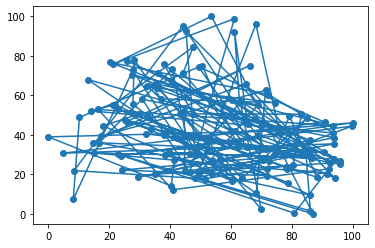

In [25]:
# Mostramos las Ciudades.
# Escalado - me saca un array con todo lo de la posicion 0 y lo de la posicion 1
# plt.scatter hace un ploteo de los puntos
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la ruta inicial, estan organizadas en orden alfabetico.
# Decimos que una los puntos y luego los pintamos
plt.plot(escalado[:,0], escalado[:,1])
plt.show()

# Busqueda de Rutas

In [26]:
# Encontramos una buena ruta (la ruta da el orden de viaje por numero de fila)
# Va desaciendo el retuerto que tenia liado y devuelve un array con el orden correcto
# partiendo desde el 0 siempre
ruta = two_opt(escalado, 0.001)
ruta

array([  0,  63,  30,  22,  79,  20,  93,  47,  59,  43,  23,  13,  10,
        28,  67,   5,  65,  15,  35, 106,  19,  52,  44,  45,  77, 128,
         3,  56, 123,  87, 124,  85,  90, 122, 120,  26, 126,  76,  51,
        48, 110,  11,  70, 101,  68,  33,  73,  89,  62,   7, 102, 109,
        82,  80,  55, 105, 133, 115, 127, 132,  39,  57,  18,  32,  74,
        71,  27, 118,  95,  69,  81,  88, 100, 116, 111, 125,  54, 117,
        42,   6,  38,  61,  98,  91,  25, 134,  92,  46,   2,   8, 136,
        99,  96,  84,  72,  60,  29, 103,  14,  58, 130,  50,   9,   4,
        21, 121,  36,  86,  12, 112,  24,  78,  83, 129, 104,  40, 113,
        41,  66,   1,  64, 119, 108,  17,  16, 131, 114,  31, 135, 107,
        34,  53,  94,  97,  75,  37,  49])

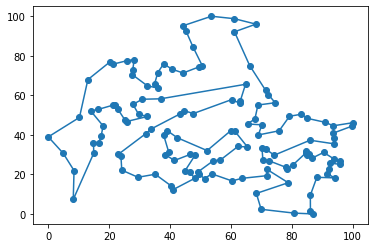

Ruta: [  0  63  30  22  79  20  93  47  59  43  23  13  10  28  67   5  65  15
  35 106  19  52  44  45  77 128   3  56 123  87 124  85  90 122 120  26
 126  76  51  48 110  11  70 101  68  33  73  89  62   7 102 109  82  80
  55 105 133 115 127 132  39  57  18  32  74  71  27 118  95  69  81  88
 100 116 111 125  54 117  42   6  38  61  98  91  25 134  92  46   2   8
 136  99  96  84  72  60  29 103  14  58 130  50   9   4  21 121  36  86
  12 112  24  78  83 129 104  40 113  41  66   1  64 119 108  17  16 131
 114  31 135 107  34  53  94  97  75  37  49]

Distancia Escalada: 817.1483823447345


In [27]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta, segun el orden del array:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]] 
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))
# Mostramos las Ciudades ya ordenadas.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0], nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: " 
      + str(distancia_ruta(ruta, escalado)))


In [28]:
# Ahora pintamos una tabla con el orden, marcan el original y luego el index que es el orden.
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

,index,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,0,LA SAGRADA,"40.743607,-6.072182",40.743607,-6.072182,-0.105980,0.711110,4799.828744,-510.596831
1,63,PERALEJOS DE ABAJO,"41.004329,-6.363154",41.004329,-6.363154,-0.111058,0.715661,4778.319119,-532.863067
2,30,LA REDONDA,"40.908303,-6.749546",40.908303,-6.749546,-0.117802,0.713985,4781.567446,-565.897383
3,22,FUENTES DE ONORO,"40.589462,-6.81175",40.589462,-6.811750,-0.118887,0.708420,4803.928963,-573.833052
4,79,LA ALBERGUERIA DE ARGANAN,"40.412241,-6.813318",40.412241,-6.813318,-0.118915,0.705327,4816.621166,-575.482842
...,...,...,...,...,...,...,...,...,...
132,94,ALMARAZ DE DUERO,"41.4741,-5.915668",41.474100,-5.915668,-0.103248,0.723860,4748.084236,-491.979081
133,97,ALMEIDA DE SAYAGO,"41.266208,-6.075509",41.266208,-6.075509,-0.106038,0.720231,4761.885644,-506.840155
134,75,MORALEJA DE SAYAGO,"41.183803,-6.003873",41.183803,-6.003873,-0.104787,0.718793,4768.521085,-501.517661
135,37,ROLLAN,"40.961931,-5.916909",40.961931,-5.916909,-0.103270,0.714921,4785.399759,-495.950341


In [29]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

,index,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,0,LA SAGRADA,"40.743607,-6.072182",40.743607,-6.072182,-0.105980,0.711110,4799.828744,-510.596831
1,63,PERALEJOS DE ABAJO,"41.004329,-6.363154",41.004329,-6.363154,-0.111058,0.715661,4778.319119,-532.863067
2,30,LA REDONDA,"40.908303,-6.749546",40.908303,-6.749546,-0.117802,0.713985,4781.567446,-565.897383
3,22,FUENTES DE ONORO,"40.589462,-6.81175",40.589462,-6.811750,-0.118887,0.708420,4803.928963,-573.833052
4,79,LA ALBERGUERIA DE ARGANAN,"40.412241,-6.813318",40.412241,-6.813318,-0.118915,0.705327,4816.621166,-575.482842
...,...,...,...,...,...,...,...,...,...
133,97,ALMEIDA DE SAYAGO,"41.266208,-6.075509",41.266208,-6.075509,-0.106038,0.720231,4761.885644,-506.840155
134,75,MORALEJA DE SAYAGO,"41.183803,-6.003873",41.183803,-6.003873,-0.104787,0.718793,4768.521085,-501.517661
135,37,ROLLAN,"40.961931,-5.916909",40.961931,-5.916909,-0.103270,0.714921,4785.399759,-495.950341
136,49,CARRASCAL DE BARREGAS,"40.978695,-5.761913",40.978695,-5.761913,-0.100564,0.715213,4785.507850,-482.880420


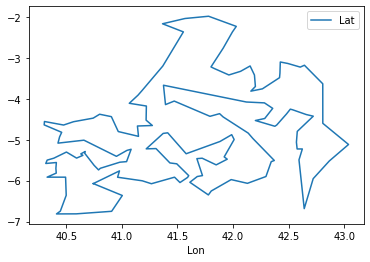

In [30]:
# Dibujar Latitud y Longitud.  Lo pintamos en bonito con longitud y latitud.
ciclo.plot(kind="line", x="Lon", y="Lat");

# Representacion de las Rutas

In [31]:
# Escribimos la ruta como puntos:
viajante = ciclo[["Lon", "Lat"]]

In [32]:
viajante.iloc[0]

Lon    40.743607
Lat    -6.072182
Name: 0, dtype: float64

In [33]:
import folium

In [34]:
# Folium es una aplicacion que permite traerte un mapa. Nos traemos desde el punto 0
# hasta el ulitmo
mapa = folium.Map(location=viajante.iloc[0], zoom_start=10.2)
puntos_totales = len(viajante)
for i in range(0, puntos_totales):
  x = viajante.iloc[i]['Lon'] #Cogemos longitud
  y = viajante.iloc[i]['Lat'] #Cogemos latitud
  punto = [x, y] # Contruimos un punto
  ciudad = ciclo.iloc[i][0] # Creamos ciudad con el orden y la x.
  # Pintamos el punto 0 en negro y en azules los otros
  if i == 0 or i == puntos_totales - 1: 
    color = 'black'
  else:
    color = 'blue'

  icon = folium.Icon(color=color)
  folium.Marker(punto, popup=ciudad, icon=icon).add_to(mapa)

  if i != 0:
    x_ant = viajante.iloc[i-1]['Lon']
    y_ant = viajante.iloc[i-1]['Lat']
    punto_anterior = [x_ant, y_ant]
    folium.PolyLine([punto, punto_anterior],
                  color='red',
                  weight=15,
                  opacity=0.8).add_to(mapa)
  
mapa